## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
athletes = pd.read_csv("DATA/athlete_events.csv")
regions = pd.read_csv("DATA/noc_regions.csv")

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
# Merging athletes and region dataframe on NOC column.
df = pd.merge(athletes,regions,on='NOC')

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [9]:
df.shape

(270767, 17)

In [12]:
# Checking duplicates
df.duplicated().sum()

1385

In [13]:
# dropping duplicate rows
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
# Check null values in dataframe
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9303
Height     58726
Weight     61437
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229619
region        21
notes     264347
dtype: int64

In [16]:
df.Medal.unique()

array([nan, 'Silver', 'Bronze', 'Gold'], dtype=object)

In [17]:
df['Medal'].fillna('No_Medal',inplace=True)

In [18]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9303
Height     58726
Weight     61437
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region        21
notes     264347
dtype: int64

In [19]:
# Split df in two new dataframe based on Season
df['Season'].value_counts()

Summer    220818
Winter     48564
Name: Season, dtype: int64

In [20]:
summer = df[df['Season']=='Summer']

In [21]:
summer.shape

(220818, 17)

In [52]:
winter = df[df['Season']=='Winter']

In [53]:
winter.shape

(48564, 17)

## Season-Wise Medal Tally

In [38]:
medal_count_summer = summer.groupby(['NOC','Medal']).size().reset_index(name='count')

In [39]:
medal_pivot_summer = medal_count_summer.pivot(index='NOC',columns='Medal',values='count').fillna(0)

In [40]:
medal_pivot_summer = medal_pivot_summer.astype(int)

In [41]:
medal_pivot_summer

Medal,Bronze,Gold,No_Medal,Silver
NOC,,,,
AFG,2,0,75,0
AHO,0,0,58,1
ALB,0,0,57,0
ALG,7,4,359,1
AND,0,0,45,0
...,...,...,...,...
YEM,0,0,32,0
YMD,0,0,5,0
YUG,24,19,608,27


In [42]:
medal_pivot_summer['Total_Medal'] = medal_pivot_summer[['Gold','Silver','Bronze']].sum(axis=1)

In [43]:
medal_pivot_summer

Medal,Bronze,Gold,No_Medal,Silver,Total_Medal
NOC,,,,,
AFG,2,0,75,0,2
AHO,0,0,58,1,1
ALB,0,0,57,0,0
ALG,7,4,359,1,12
AND,0,0,45,0,0
...,...,...,...,...,...
YEM,0,0,32,0,0
YMD,0,0,5,0,0
YUG,24,19,608,27,70


In [44]:
medal_pivot_summer.sort_values(by=['Gold','Silver','Bronze'],ascending=False).head(50)

Medal,Bronze,Gold,No_Medal,Silver,Total_Medal
NOC,,,,,
USA,371,622,3037,398,1391
URS,179,279,873,206,664
GBR,202,182,3157,207,591
GER,207,177,2093,186,570
FRA,212,163,3071,166,541
CHN,99,161,1311,105,365
ITA,157,154,2545,148,459
HUN,134,123,2116,118,375
GDR,90,112,474,74,276


In [36]:
summer= summer.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event'])

In [37]:
summer.shape

(98657, 17)

In [54]:
winter= winter.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event'])

In [55]:
winter.shape

(16956, 17)

In [56]:
medal_count_winter = winter.groupby(['NOC','Medal']).size().reset_index(name='count')

In [57]:
medal_pivot_winter = medal_count_winter.pivot(index='NOC',columns='Medal',values='count').fillna(0)

In [58]:
medal_pivot_winter = medal_pivot_winter.astype(int)

In [59]:
medal_pivot_winter['Total_Medal'] = medal_pivot_winter[['Gold','Silver','Bronze']].sum(axis=1)

In [60]:
medal_pivot_winter

Medal,Bronze,Gold,No_Medal,Silver,Total_Medal
NOC,,,,,
AHO,0,0,3,0,0
ALB,0,0,7,0,0
ALG,0,0,9,0,0
AND,0,0,69,0,0
ARG,0,0,169,0,0
...,...,...,...,...,...
USA,44,39,894,48,131
UZB,0,1,26,0,1
VEN,0,0,5,0,0


## Country Wise Medal Tally

In [62]:
medal_pivot_summer

Medal,Bronze,Gold,No_Medal,Silver,Total_Medal
NOC,,,,,
AFG,2,0,75,0,2
AHO,0,0,58,1,1
ALB,0,0,57,0,0
ALG,7,4,359,1,12
AND,0,0,45,0,0
...,...,...,...,...,...
YEM,0,0,32,0,0
YMD,0,0,5,0,0
YUG,24,19,608,27,70


In [67]:
def fetch_noc(noc,pivot_table):
    if noc in pivot_table.index:
        details = {
            'Gold':pivot_table.loc[noc,'Gold'],
            'Silver':pivot_table.loc[noc,'Silver'],
            'Bronze':pivot_table.loc[noc,'Bronze'],
            'No Medal':pivot_table.loc[noc,'No_Medal']
        }
        return details
    else:
        print('No NOC Exist')

In [68]:
fetch_noc('YUG',medal_pivot_summer)

{'Gold': 19, 'Silver': 27, 'Bronze': 24, 'No Medal': 608}

In [69]:
fetch_noc('YUGd',medal_pivot_summer)

No NOC Exist


## Year Wise Search

In [70]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,No_Medal,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",No_Medal,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,No_Medal,China,NaN


In [71]:
summer.shape

(98657, 17)

In [76]:
summer.isnull().sum()

ID            0
Name          0
Sex           0
Age        3118
Height    17823
Weight    18180
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        0
notes     96593
dtype: int64

In [75]:
summer.dropna(subset=['region'],inplace=True)

In [77]:
summer.shape

(98637, 17)

In [78]:
medals_count = summer.groupby(['Year','region','Medal']).size().unstack(fill_value=0)

In [81]:
medals_count

Medal                         Bronze  Gold  No_Medal  Silver
Year region                                                 
1896 Australia                     1     2         2       0
     Austria                       2     2         3       1
     Denmark                       3     1         6       2
     France                        2     1        11       4
     Germany                       1     4        21       1
...                              ...   ...       ...     ...
2016 Virgin Islands, British       0     0         4       0
     Virgin Islands, US            0     0         7       0
     Yemen                         0     0         3       0
     Zambia                        0     0         7       0
     Zimbabwe                      0     0        13       0

[2769 rows x 4 columns]

In [82]:
medals_count = medals_count.reset_index()

In [83]:
medals_count

Medal,Year,region,Bronze,Gold,No_Medal,Silver
0,1896,Australia,1,2,2,0
1,1896,Austria,2,2,3,1
2,1896,Denmark,3,1,6,2
3,1896,France,2,1,11,4
4,1896,Germany,1,4,21,1
...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0
2765,2016,"Virgin Islands, US",0,0,7,0
2766,2016,Yemen,0,0,3,0
2767,2016,Zambia,0,0,7,0


In [84]:
medals_count['Total_Medal'] = medals_count['Gold']+medals_count['Silver']+medals_count['Bronze']

In [85]:
medals_count

Medal,Year,region,Bronze,Gold,No_Medal,Silver,Total_Medal
0,1896,Australia,1,2,2,0,3
1,1896,Austria,2,2,3,1,5
2,1896,Denmark,3,1,6,2,6
3,1896,France,2,1,11,4,7
4,1896,Germany,1,4,21,1,6
...,...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0,0
2765,2016,"Virgin Islands, US",0,0,7,0,0
2766,2016,Yemen,0,0,3,0,0
2767,2016,Zambia,0,0,7,0,0


In [91]:
def plot_medal(year,country,df):
    filtered_df = df[(df['Year']==year) & (df['region']==country)]
    gold = filtered_df['Gold'].values[0]
    silver = filtered_df['Silver'].values[0]
    bronze = filtered_df['Bronze'].values[0]
    total_medal = filtered_df['Total_Medal'].values[0]
    fig,ax = plt.subplots()
    medals = ['Gold','Silver','Bronze','Total_Medals']
    counts = [gold,silver,bronze,total_medal]
    ax.bar(medals,counts,color=['gold','silver','brown','green'])
    plt.show()

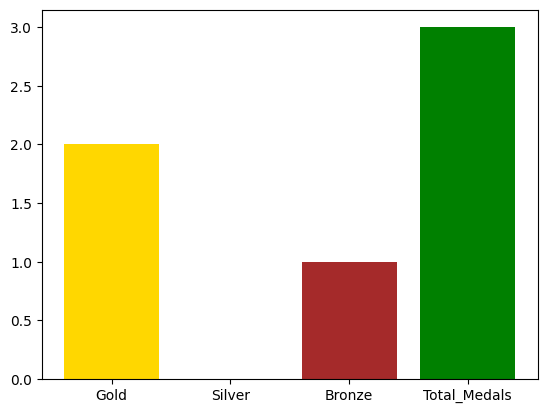

In [92]:
plot_medal(1896,'Australia',medals_count)

## Year Wise Progress Of a Country

In [93]:
medals_count

Medal,Year,region,Bronze,Gold,No_Medal,Silver,Total_Medal
0,1896,Australia,1,2,2,0,3
1,1896,Austria,2,2,3,1,5
2,1896,Denmark,3,1,6,2,6
3,1896,France,2,1,11,4,7
4,1896,Germany,1,4,21,1,6
...,...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0,0
2765,2016,"Virgin Islands, US",0,0,7,0,0
2766,2016,Yemen,0,0,3,0,0
2767,2016,Zambia,0,0,7,0,0


In [100]:
def plot_year_progress(country,df):
    filtered_df = df[df['region']==country]
    fig,ax = plt.subplots()
    ax.plot(filtered_df['Year'],filtered_df['Gold'],color='gold',label='GOLD',marker='o',linestyle='-')
    ax.plot(filtered_df['Year'],filtered_df['Silver'],color='silver',label='SILVER',marker='o',linestyle='-')
    ax.plot(filtered_df['Year'],filtered_df['Bronze'],color='brown',label='BRONZE',marker='o',linestyle='-')
    ax.plot(filtered_df['Year'],filtered_df['Total_Medal'],color='green',label='TOTAL_MEDALS',marker='o',linestyle='-')
    ax.legend()
    plt.show()

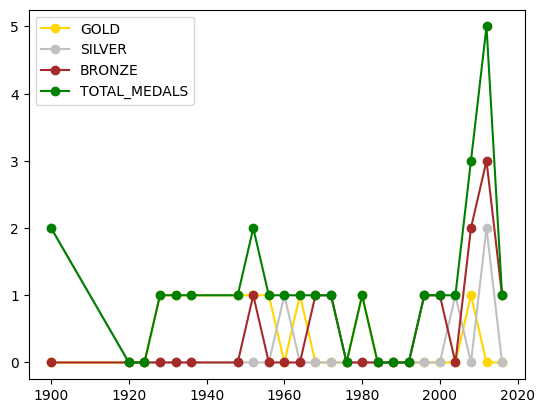

In [101]:
plot_year_progress('India',medals_count)

In [102]:
medals_count

Medal,Year,region,Bronze,Gold,No_Medal,Silver,Total_Medal
0,1896,Australia,1,2,2,0,3
1,1896,Austria,2,2,3,1,5
2,1896,Denmark,3,1,6,2,6
3,1896,France,2,1,11,4,7
4,1896,Germany,1,4,21,1,6
...,...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0,0
2765,2016,"Virgin Islands, US",0,0,7,0,0
2766,2016,Yemen,0,0,3,0,0
2767,2016,Zambia,0,0,7,0,0


In [105]:
medals_count = medals_count.to_numpy()

In [107]:
medals_count = medals_count[:,None]

In [108]:
medals_count

array([[[1896, 'Australia', 1, ..., 2, 0, 3]],

       [[1896, 'Austria', 2, ..., 3, 1, 5]],

       [[1896, 'Denmark', 3, ..., 6, 2, 6]],

       ...,

       [[2016, 'Yemen', 0, ..., 3, 0, 0]],

       [[2016, 'Zambia', 0, ..., 7, 0, 0]],

       [[2016, 'Zimbabwe', 0, ..., 13, 0, 0]]], dtype=object)

In [118]:
x = summer.groupby(['Year','region','Medal']).size().unstack(fill_value=0)

In [119]:
x 

Medal                         Bronze  Gold  No_Medal  Silver
Year region                                                 
1896 Australia                     1     2         2       0
     Austria                       2     2         3       1
     Denmark                       3     1         6       2
     France                        2     1        11       4
     Germany                       1     4        21       1
...                              ...   ...       ...     ...
2016 Virgin Islands, British       0     0         4       0
     Virgin Islands, US            0     0         7       0
     Yemen                         0     0         3       0
     Zambia                        0     0         7       0
     Zimbabwe                      0     0        13       0

[2769 rows x 4 columns]

In [120]:
x=x.reset_index()

In [121]:
x

Medal,Year,region,Bronze,Gold,No_Medal,Silver
0,1896,Australia,1,2,2,0
1,1896,Austria,2,2,3,1
2,1896,Denmark,3,1,6,2
3,1896,France,2,1,11,4
4,1896,Germany,1,4,21,1
...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0
2765,2016,"Virgin Islands, US",0,0,7,0
2766,2016,Yemen,0,0,3,0
2767,2016,Zambia,0,0,7,0


[]

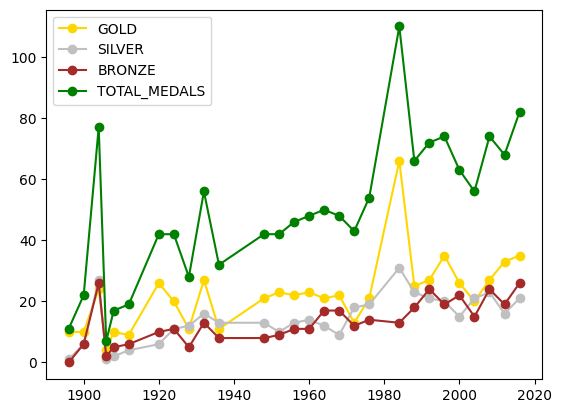

In [125]:
x['Total_Medal'] = x['Gold']+x['Silver']+x['Bronze']
    
filtered_df = x[x['region']=='USA']
fig,ax = plt.subplots()
ax.plot(filtered_df['Year'],filtered_df['Gold'],color='gold',label='GOLD',marker='o',linestyle='-')
ax.plot(filtered_df['Year'],filtered_df['Silver'],color='silver',label='SILVER',marker='o',linestyle='-')
ax.plot(filtered_df['Year'],filtered_df['Bronze'],color='brown',label='BRONZE',marker='o',linestyle='-')
ax.plot(filtered_df['Year'],filtered_df['Total_Medal'],color='green',label='TOTAL_MEDALS',marker='o',linestyle='-')
ax.legend()
plt.plot()
